In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [37]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array

In [38]:
print(os.listdir('/Users/user/Downloads/Emotion/Facial_emotion'))

['test', 'train']


In [39]:
Facial_train='C:/Users/user/Downloads/Emotion/Facial_emotion/train'

In [40]:
Facial_test='C:/Users/user/Downloads/Emotion/Facial_emotion/test'

In [41]:
emotion_names= sorted(os.listdir(Facial_train))
print(emotion_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [42]:
emotion_names2= sorted(os.listdir(Facial_test))
print(emotion_names2)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [43]:
batch_size = 64
target_size = (48,48)

Face_train_datagen = ImageDataGenerator(rescale=1./255)
Face_test_datagen   = ImageDataGenerator(rescale=1./255)

Face_train_generator = Face_train_datagen.flow_from_directory(
       Facial_train,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Face_test_generator = Face_test_datagen.flow_from_directory(
        Facial_test,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [44]:
#Data Preparation
input_shape = (48,48,1) # img_rows, img_colums, color_channels
number_of_classes = 7

In [45]:
print(os.listdir('C:/Users/user/Downloads/Emotion/Facial_emotion/train'))

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [46]:
#Dividing all data class variable

def plot_images(image_directory, top=10):
    Total_picture_directoris = os.listdir(image_directory)
    picture_files = [os.path.join(image_directory, file) for file in Total_picture_directoris][:5]
  
    plt.figure(figsize=(12, 12))
  
    for idx, image_path in enumerate(picture_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(image_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='plasma')

Angry Pictures 



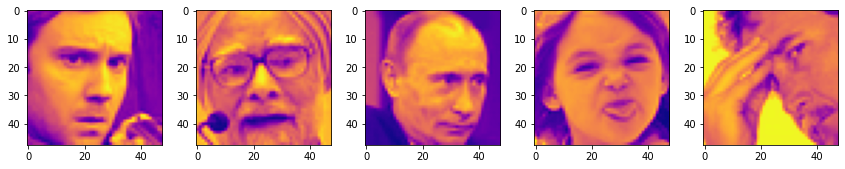

In [47]:
print('Angry Pictures ')
print()
plot_images(Facial_train+'/angry')

Disgusted Pictures 



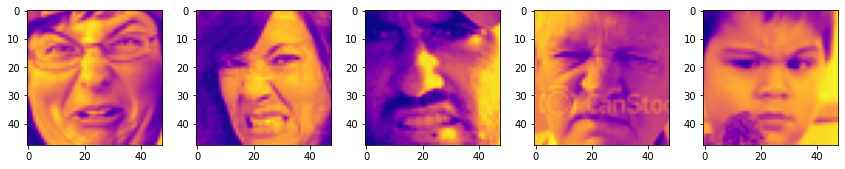

In [48]:
print('Disgusted Pictures ')
print()
plot_images(Facial_train+'/disgusted')

Fear Pictures



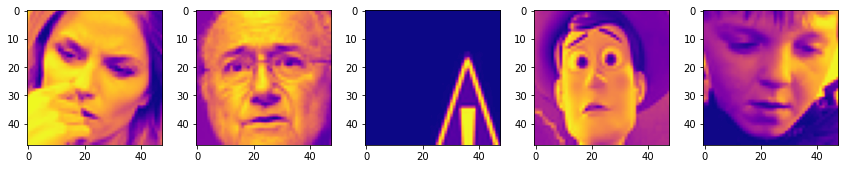

In [49]:
print('Fear Pictures')
plot_images(Facial_train+'/fearful')
print()

Haapy Pictures



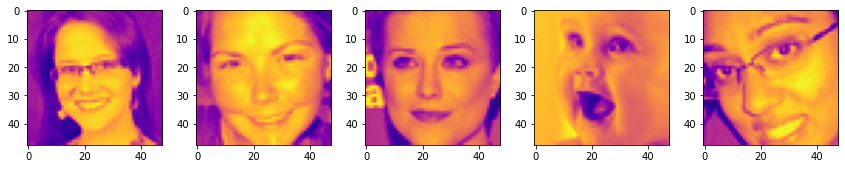

In [50]:
print('Haapy Pictures')
plot_images(Facial_train+'/happy')
print()

Neutral Pictures



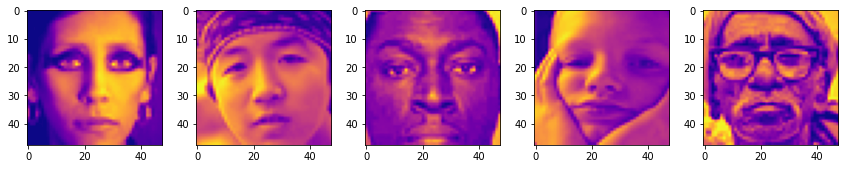

In [51]:
print('Neutral Pictures')
plot_images(Facial_train+'/neutral')
print()

Sad Pictures



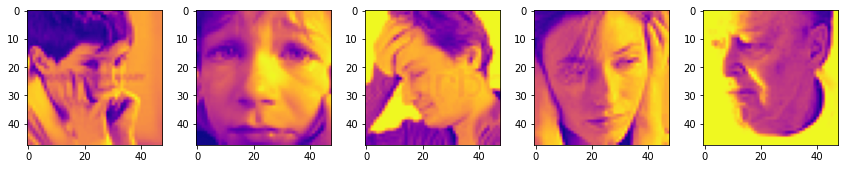

In [52]:
print('Sad Pictures')
plot_images(Facial_train+'/sad')
print()

Train and Test Surprised Pictures




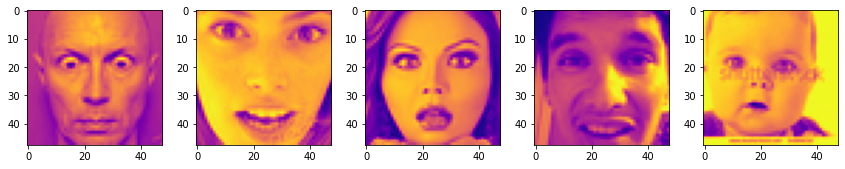

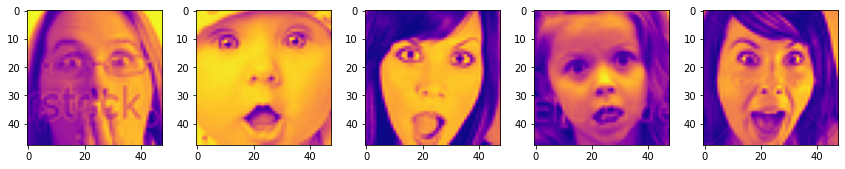

In [53]:
print('Train and Test Surprised Pictures')
plot_images(Facial_train+'/surprised')
print()
#print('Surprised Pictures')
plot_images(Facial_test+'/surprised')
print()

In [54]:
#Data Visuallisation
expressions = os.listdir('C:/Users/user/Downloads/Emotion/Facial_emotion/train')
for emotion in expressions:
    count = len(os.listdir(f'C:/Users/user/Downloads/Emotion/Facial_emotion/train/{emotion}'))
    print(f'{emotion} faces={count}')

angry faces=3995
disgusted faces=436
fearful faces=4097
happy faces=7215
neutral faces=4965
sad faces=4830
surprised faces=3171


In [56]:
expressions = os.listdir('C:/Users/user/Downloads/Emotion/Facial_emotion/test')
for emotion in expressions:
    count = len(os.listdir(f'C:/Users/user/Downloads/Emotion/Facial_emotion/test/{emotion}'))
    print(f'{emotion} faces={count}')

angry faces=958
disgusted faces=111
fearful faces=1024
happy faces=1774
neutral faces=1233
sad faces=1247
surprised faces=831


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


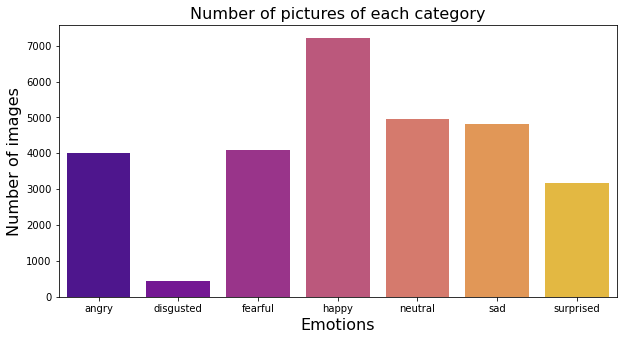

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

expressions = os.listdir('C:/Users/user/Downloads/Emotion/Facial_emotion/train')
Label_values = [len(os.listdir(f'C:/Users/user/Downloads/Emotion/Facial_emotion/train/{emotion}')) for emotion in expressions]
fig = plt.figure(figsize = (10, 5))
sns.barplot(expressions, Label_values ,palette = 'plasma')
plt.xlabel("Emotions",fontsize = 16)
plt.ylabel("Number of images",fontsize = 16)
plt.title("Number of pictures of each category", fontsize = 16)
plt.show()


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


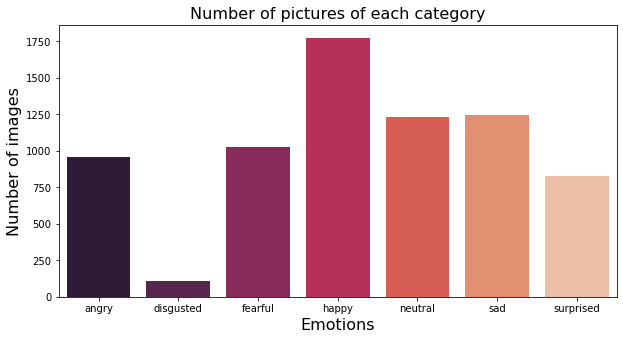

In [58]:
expressions = os.listdir('C:/Users/user/Downloads/Emotion/Facial_emotion/test')
Label_values2  = [len(os.listdir(f'C:/Users/user/Downloads/Emotion/Facial_emotion/test/{emotion}')) for emotion in expressions]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
sns.barplot(expressions, Label_values2 ,palette = 'rocket')
plt.xlabel("Emotions",fontsize = 16)
plt.ylabel("Number of images",fontsize = 16)
plt.title("Number of pictures of each category", fontsize = 16)
plt.show()


In [59]:
#Model Building
#CNN

import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
model= tf.keras.models.Sequential()
model.add(Conv2D(32,(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

In [60]:
Face_train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
Face_test_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [61]:
img_size=48

In [62]:
Face_train_generator = Face_train_datagen.flow_from_directory(directory = Facial_train,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
Face_test_generator = Face_test_datagen.flow_from_directory( directory = Facial_test,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [63]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
epochs = 10
batch_size = 64

In [65]:
history = model.fit(x = Face_train_generator,epochs = epochs,validation_data = Face_test_generator)

Epoch 1/10
  3/359 [..............................] - ETA: 24:50 - loss: 3.1614 - accuracy: 0.1094 

KeyboardInterrupt: 

In [534]:
cnn_score = model.evaluate_generator(Face_test_generator) 
print('Test loss: ', cnn_score[0])
print('Test accuracy: ', cnn_score[1]*100)

C:\Users\user\AppData\Local\Temp/ipykernel_10984/1030871013.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  cnn_score = model.evaluate_generator(Face_test_generator)


Test loss:  1.283052921295166
Test accuracy:  52.23463773727417


In [66]:
y_pred = model.predict(Face_test_generator)

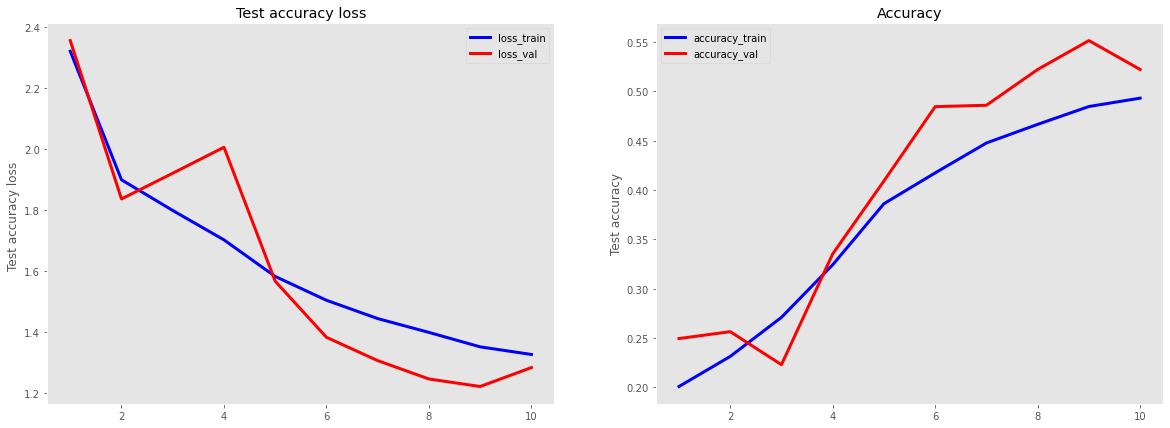

In [535]:
figure, axs = plt.subplots(1, 2, figsize=(20, 7))
plt.subplot(1, 2, 1)
axs = axs.ravel()
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
axs[0].plot(epochs, loss, 'b', label='loss_train',linewidth=3)
axs[0].plot(epochs, loss_val, 'r', label='loss_val',linewidth=3)
axs[0].set_title('Test accuracy loss')

axs[0].set_ylabel('Test accuracy loss ')
axs[0].legend()
axs[0].grid()
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'b', label='accuracy_train',linewidth=3)
axs[1].plot(epochs, acc_val, 'r', label='accuracy_val',linewidth=3)
axs[1].set_title('Accuracy')

axs[1].set_ylabel('Test accuracy')
axs[1].legend()
axs[1].grid()
plt.show()

In [67]:
#ANN

model_classifier = Sequential()
model_classifier.add(Dense(128, input_shape=input_shape, activation='relu'))
model_classifier.add(Dropout(0.4))
model_classifier.add(Dense(64, activation='relu'))
model_classifier.add(Dropout(0.6))
model_classifier.add(Flatten())
model_classifier.add(Dense(7, activation='softmax'))
model_classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 48, 48, 128)       256       
                                                                 
 dropout_14 (Dropout)        (None, 48, 48, 128)       0         
                                                                 
 dense_10 (Dense)            (None, 48, 48, 64)        8256      
                                                                 
 dropout_15 (Dropout)        (None, 48, 48, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 147456)            0         
                                                                 
 dense_11 (Dense)            (None, 7)                 1032199   
                                                                 
Total params: 1,040,711
Trainable params: 1,040,711
No

In [68]:
model_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
num_epochs = 10

x_train = Face_train_generator.n//Face_train_generator.batch_size
y_test   = Face_test_generator.n//Face_test_generator.batch_size

In [70]:
model_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
history = model_classifier.fit(x=Face_train_generator, steps_per_epoch=x_train, epochs=num_epochs, batch_size=batch_size, validation_data=Face_test_generator, validation_steps=y_test)
history

Epoch 1/10
  2/358 [..............................] - ETA: 9:32 - loss: 0.6083 - accuracy: 0.1797 

KeyboardInterrupt: 

In [639]:
ANN_score = model_classifier.evaluate_generator(Face_test_generator) 
print('Test loss: ', ANN_score[0])
print('Test accuracy: ', ANN_score[1]*100)

C:\Users\user\AppData\Local\Temp/ipykernel_10984/3148841446.py:1: UserWarning:

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



Test loss:  0.3990649878978729
Test accuracy:  34.91620123386383


In [72]:
num_epochs = 10
x_train = Face_train_generator.n//Face_train_generator.batch_size
y_test   = Face_test_generator.n//Face_test_generator.batch_size

In [73]:
from keras.models import Model, Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Bidirectional

In [74]:
#LSTM

model_LSTM = Sequential()
model_LSTM.add(LSTM(256, return_sequences=True, input_shape=(4,189)))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(128, return_sequences=True))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(64, return_sequences=True))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(64))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(Dense(units=1))

model_LSTM.add(Dense(10, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 256)            456704    
                                                                 
 dropout_16 (Dropout)        (None, 4, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 128)            197120    
                                                                 
 dropout_17 (Dropout)        (None, 4, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_18 (Dropout)        (None, 4, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [75]:
history = model_LSTM.fit(x=Face_train_generator, steps_per_epoch=x_train, epochs=num_epochs, batch_size=batch_size, validation_data=Face_test_generator, validation_steps=y_test)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 213, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_4" (type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, None, None, None)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, None, None, None), dtype=float32)
      • training=True
      • mask=None


In [ ]:
Score = model_ann.evaluate_generator(Face_test_generator) 
print('Test loss: ', Score[0])
print('Test accuracy: ', Score[1]*100)

NameError: name 'history' is not defined

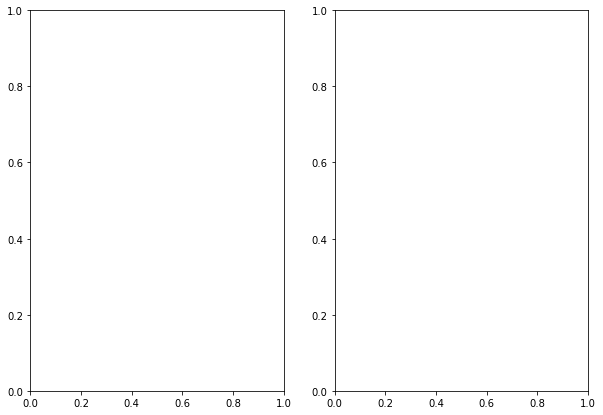

In [76]:
figure, axs = plt.subplots(1, 2, figsize=(10, 7))
plt.subplot(1, 2, 1)
axs = axs.ravel()
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
axs[0].plot(epochs, loss, 'b', label='loss_train',linewidth=3)
axs[0].plot(epochs, loss_val, 'r', label='loss_val',linewidth=3)
axs[0].set_title('Test accuracy loss')

axs[0].set_ylabel('Test accuracy loss ')
axs[0].legend()
axs[0].grid()
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'b', label='accuracy_train',linewidth=3)
axs[1].plot(epochs, acc_val, 'r', label='accuracy_val',linewidth=3)
axs[1].set_title('Accuracy')

axs[1].set_ylabel('Test accuracy')
axs[1].legend()
axs[1].grid()
plt.show()

<Figure size 1368x360 with 0 Axes>

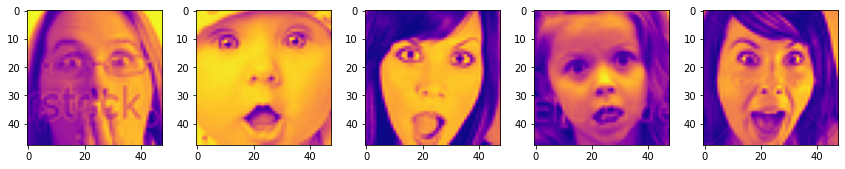

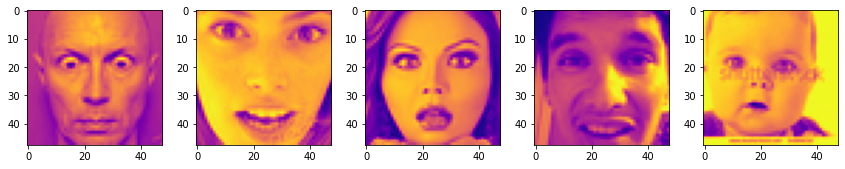

In [82]:
numberof_pictures = 1
plt.figure(figsize=(19, 5))
for i in range(numberof_pictures):
    #ax = plt.subplot(1, numberof_pictures, i+1)
    plot_images(Facial_test+'/surprised')
    plot_images(Facial_train+'/surprised')
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

print()